In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import linear_model

In [2]:
error = np.random.randn(10**4)
error

array([-1.24876728, -0.36652639,  1.23558791, ..., -0.29948935,
        0.59796523, -2.54661951])

In [3]:
lng = 0.02+0.02*error
lng

array([-0.00497535,  0.01266947,  0.04471176, ...,  0.01401021,
        0.0319593 , -0.03093239])

In [4]:
g = np.exp(lng)
g

array([0.99503701, 1.01275007, 1.04572639, ..., 1.01410882, 1.03247549,
       0.96954112])

In [5]:
rf = 1.0303

In [6]:
b0 = np.arange(0,10.1,0.1)
b0

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [7]:
def v(x):
    v_list = []
    for i in g:
        if x*i>=1.0303:
            y = x*i-1.0303
        else:
            y = 2*(x*i-1.0303)
        v_list.append(y)
    return v_list

In [8]:
def e(x,b):
    output = 0.99*b*np.mean(v(x))+0.99*x-1
    return output

In [9]:
x_list = []
for b in b0:
    upper = 1.1
    lower = 1.0
    output = e((upper+lower)/2, b)
    while abs(output) > 1e-5:
        if output>0:
            upper=(lower+upper)/2
            output = e((lower+upper)/2,b)
        else:
            lower=(lower+upper)/2
            output = e((lower+upper)/2,b)
    x_list.append((upper+lower)/2)

In [10]:
type(x_list)

list

In [11]:
x_array = np.array(x_list)
x_array

array([1.01010742, 1.01079102, 1.01132812, 1.01175537, 1.01209717,
       1.01239014, 1.01263428, 1.0128418 , 1.0130188 , 1.01317749,
       1.01331787, 1.01343994, 1.0135498 , 1.01364746, 1.01373901,
       1.01381836, 1.01389771, 1.01396484, 1.01402588, 1.01408691,
       1.01414185, 1.01419067, 1.01423645, 1.01428223, 1.0143219 ,
       1.01436157, 1.01439514, 1.01442871, 1.01446228, 1.0144928 ,
       1.01452026, 1.01454773, 1.01457214, 1.01459656, 1.01462097,
       1.01464233, 1.0146637 , 1.01468506, 1.01470337, 1.01472168,
       1.01473999, 1.01475525, 1.01477356, 1.01478882, 1.01480408,
       1.01481781, 1.01483154, 1.01484375, 1.01485901, 1.01487122,
       1.01488342, 1.0148941 , 1.01490479, 1.01491699, 1.01492615,
       1.0149353 , 1.01494598, 1.01495667, 1.01496582, 1.01497345,
       1.0149826 , 1.01499023, 1.01499939, 1.01500702, 1.01501465,
       1.01502228, 1.01502991, 1.01503601, 1.01504364, 1.01504974,
       1.01505737, 1.01506348, 1.01506958, 1.01507568, 1.01508

In [12]:
pd_ratio = 1/x_array-1
pd_ratio

array([-0.01000628, -0.01067581, -0.01120124, -0.01161879, -0.01195258,
       -0.0122385 , -0.01247664, -0.01267898, -0.01285149, -0.0130061 ,
       -0.01314284, -0.0132617 , -0.01336866, -0.01346372, -0.01355281,
       -0.01363001, -0.01370721, -0.01377251, -0.01383187, -0.01389123,
       -0.01394464, -0.01399212, -0.01403662, -0.01408112, -0.01411968,
       -0.01415824, -0.01419086, -0.01422348, -0.0142561 , -0.01428576,
       -0.01431244, -0.01433913, -0.01436285, -0.01438656, -0.01441028,
       -0.01443103, -0.01445178, -0.01447253, -0.01449031, -0.0145081 ,
       -0.01452588, -0.0145407 , -0.01455848, -0.0145733 , -0.01458811,
       -0.01460145, -0.01461478, -0.01462664, -0.01464145, -0.0146533 ,
       -0.01466516, -0.01467553, -0.0146859 , -0.01469775, -0.01470663,
       -0.01471552, -0.01472589, -0.01473626, -0.01474515, -0.01475255,
       -0.01476144, -0.01476885, -0.01477773, -0.01478514, -0.01479254,
       -0.01479995, -0.01480735, -0.01481328, -0.01482068, -0.01

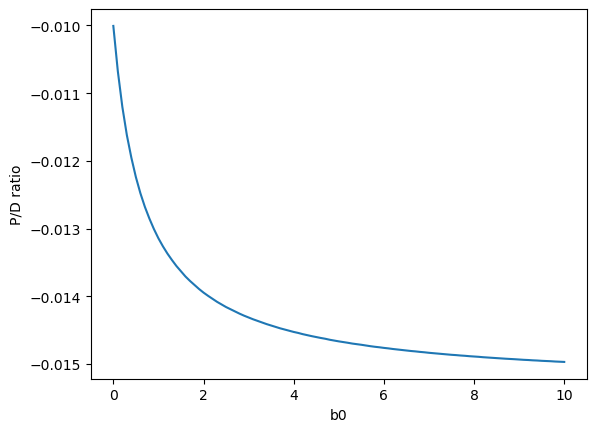

In [13]:
plt.plot(b0,pd_ratio)
plt.xlabel("b0")
plt.ylabel("P/D ratio")
plt.show()

In [14]:
import math

In [15]:
equity_premium = x_array*math.exp(0.0202)
equity_premium

array([1.03071907, 1.03141661, 1.03196468, 1.03240064, 1.03274942,
       1.03304836, 1.03329749, 1.03350924, 1.03368985, 1.03385178,
       1.03399503, 1.03411959, 1.03423169, 1.03433134, 1.03442476,
       1.03450573, 1.03458669, 1.0346552 , 1.03471748, 1.03477976,
       1.03483582, 1.03488564, 1.03493235, 1.03497906, 1.03501954,
       1.03506003, 1.03509428, 1.03512854, 1.03516279, 1.03519393,
       1.03522196, 1.03524998, 1.03527489, 1.03529981, 1.03532472,
       1.03534652, 1.03536832, 1.03539011, 1.0354088 , 1.03542748,
       1.03544617, 1.03546174, 1.03548042, 1.03549599, 1.03551156,
       1.03552557, 1.03553959, 1.03555204, 1.03556761, 1.03558007,
       1.03559253, 1.03560342, 1.03561432, 1.03562678, 1.03563612,
       1.03564546, 1.03565636, 1.03566726, 1.0356766 , 1.03568439,
       1.03569373, 1.03570152, 1.03571086, 1.03571864, 1.03572643,
       1.03573421, 1.035742  , 1.03574823, 1.03575601, 1.03576224,
       1.03577003, 1.03577625, 1.03578248, 1.03578871, 1.03579

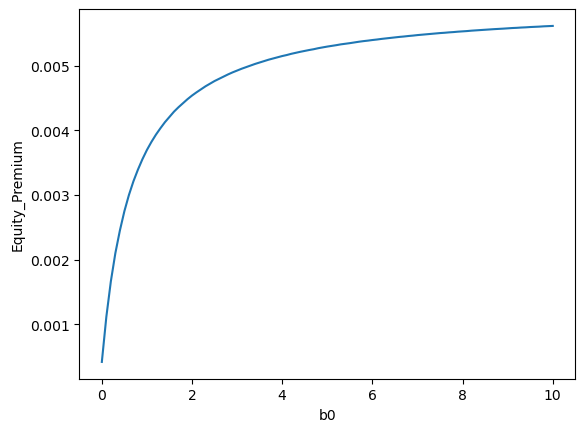

In [16]:
plt.plot(b0,equity_premium-rf)
plt.xlabel("b0")
plt.ylabel("Equity_Premium")
plt.show()